#Introdução

O objetivo do projeto de aprendizado de máquina supervisionado será predizer a etnia dos estudantes, que são classificadas entre 5 grupos.

Todas as variáveis categóricas ordinais e nominais foram transformadas em numéricas no arquivo de limpeza.

As variáveis serão escalonadas para apoiar o treinamento e realização de testes, o objetivo final é gerar para cada algoritmo de predição não supervisionada, uma taxa de acurácia de teste de aproximadamente 85%.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/studentsperformance-limpo.csv')
df.head(5)

,genero,etnia,nivel_de_escolaridade_dos_pais,almoco,curso_preparatorio,pontuacao_em_matematica,pontuacao_em_leitura,pontuacao_em_escrita,pontuacao_total
0,0,1,4,0,0,72,72,74,72
1,0,2,0,0,1,69,90,88,82
2,0,1,5,0,0,90,95,93,92
3,1,0,1,1,0,47,57,44,49
4,1,2,0,0,0,76,78,75,76


## **Obs:** Os dados desse DataFrame já foram tratados e ja foi feito o Pré-Processamento para a realização dos métodos de pesquisa para Machine Learning.

## **LEGENDA**

   **- Gender (Genero) :** F (Feminino) = 0, M (Masculino) = 1

   **- Race/Ethnicity (Raça/Etnia) :**

   Group A - White (Branco) = 0 
   Group B - Black or African American (Negro ou Afro-Americano) = 1
   Group C - Asian (Asiático) = 2
   Group D - Native American/Alaska Native (Nativo Americano/Nativo do Alasca)
   = 3
   Group E - Native Hawaiian/Pacific Islander (Nativo Havaiano/ Nativo das Ilhas
   do Pacífico) = 4

   **- Parental Level of Education ( Nível de Escolaridade dos Pais) :** 

   Some College (Faculdade Incompleta) = 0
   Associate's Degree (Associado) = 1
   High School (Ensino Médio) = 2
   Some High School (Ensino Médio Incompleto) = 3
   Bachelor's Degree (Bacharél) = 4
   Master's Degree (Mestre) = 5

  **- Lunch (Almoço) :**

  Standard (Comum) = 0
  Free/Reduced (Grátis/Reduzido) = 1

  **- Test Preparation Course (Curso Preparatório para Testes) :**

  None (Nenhum) = 0
  Completed (Completado) = 1

  **- Math Score (Pontuação em Matemática)**

  **- Reading Score (Pontuação em Leitura)**

  **- Writing Score (Pontuação em Escrita)**

  **- Overall Score (Pontuação Total)**

---





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   genero                          1000 non-null   int64
 1   etnia                           1000 non-null   int64
 2   nivel_de_escolaridade_dos_pais  1000 non-null   int64
 3   almoco                          1000 non-null   int64
 4   curso_preparatorio              1000 non-null   int64
 5   pontuacao_em_matematica         1000 non-null   int64
 6   pontuacao_em_leitura            1000 non-null   int64
 7   pontuacao_em_escrita            1000 non-null   int64
 8   pontuacao_total                 1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


## Normalização ou padronização

Como o dataset possuí 1000 registros (e menos de 5000) é identificado como ideal o teste de Shapiro-Wilk para testar a normalidade dos dados:

A distribuição será considerada normal caso p-valor for superior a 5%

In [ ]:
import scipy.stats as stats

In [ ]:
#Normalidade das notas de matemática
w, p = stats.shapiro(df.pontuacao_em_matematica)
print("normalidade da pontuação em matematica")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da pontuação em matematica
valor de estátistica de Shapiro: 99.32% 
p-valor de Shapiro: 0.0145%


In [ ]:
#Normalidade das notas de leitura
w, p = stats.shapiro(df.pontuacao_em_leitura)
print("normalidade da pontuação em leitura")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da pontuação em leitura
valor de estátistica de Shapiro: 99.29% 
p-valor de Shapiro: 0.0106%


In [ ]:
#Normalidade das notas de leitura
w, p = stats.shapiro(df.pontuacao_em_escrita)
print("normalidade da pontuação em escrita")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da pontuação em escrita
valor de estátistica de Shapiro: 99.20% 
p-valor de Shapiro: 0.0029%


In [ ]:
#Normalidade das notas (total)
w, p = stats.shapiro(df.pontuacao_total)
print("normalidade da média das notas")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da média das notas
valor de estátistica de Shapiro: 99.28% 
p-valor de Shapiro: 0.0090%


As distribuições são todas não-normais (p-valor < 5%), por isso será utilizada padronização

## Previsores e teste



In [ ]:
previsores = df.iloc[:, 0:8].values

In [ ]:
previsores

array([[ 0,  1,  4, ..., 72, 72, 74],
       [ 0,  2,  0, ..., 69, 90, 88],
       [ 0,  1,  5, ..., 90, 95, 93],
       ...,
       [ 0,  2,  2, ..., 59, 71, 65],
       [ 0,  3,  0, ..., 68, 78, 77],
       [ 0,  3,  0, ..., 77, 86, 86]])

In [ ]:
previsores.shape

(1000, 8)

Originalmente utilizamos a coluna de dados de Sexo dos estudantes para predição porém por conta dos dados serem muito semelhantes causou a imprecisão na acurácia. Utilizamos então a coluna de etnias como parâmetro para predição.

In [ ]:
#O teste será realizado para predizer o a etnia (índice 1)
target = df.iloc[:, 1].values

In [ ]:
target

array([1, 2, 1, 0, 2, 1, 1, 1, 3, 1, 2, 3, 1, 0, 0, 2, 2, 1, 2, 2, 3, 1,
       3, 2, 3, 0, 1, 2, 2, 3, 3, 1, 4, 3, 4, 4, 3, 3, 3, 1, 2, 2, 1, 1,
       4, 1, 0, 2, 3, 2, 4, 4, 2, 3, 2, 2, 4, 3, 3, 2, 4, 0, 0, 2, 3, 1,
       3, 2, 1, 2, 3, 3, 0, 2, 2, 1, 4, 0, 3, 4, 1, 1, 0, 4, 3, 2, 2, 3,
       0, 3, 2, 2, 2, 2, 1, 2, 1, 4, 3, 3, 1, 3, 3, 1, 2, 2, 3, 4, 1, 1,
       3, 2, 0, 3, 4, 2, 1, 3, 3, 2, 2, 1, 2, 3, 4, 1, 1, 3, 3, 0, 3, 2,
       4, 2, 3, 2, 1, 4, 2, 3, 3, 2, 4, 0, 3, 2, 1, 2, 3, 4, 0, 0, 1, 3,
       3, 2, 4, 1, 1, 3, 1, 4, 1, 2, 4, 2, 2, 1, 1, 2, 0, 4, 3, 2, 2, 2,
       1, 2, 1, 3, 2, 2, 4, 3, 2, 2, 4, 3, 1, 2, 4, 3, 1, 3, 2, 3, 2, 4,
       1, 1, 2, 3, 2, 1, 2, 3, 4, 4, 1, 1, 3, 2, 2, 2, 4, 1, 4, 2, 1, 1,
       3, 1, 2, 3, 1, 4, 2, 3, 0, 2, 3, 2, 1, 4, 2, 3, 3, 3, 1, 2, 3, 4,
       3, 4, 3, 2, 4, 1, 1, 2, 0, 3, 1, 3, 3, 4, 2, 2, 1, 2, 2, 2, 2, 4,
       3, 3, 2, 3, 3, 4, 2, 2, 3, 3, 1, 2, 2, 4, 2, 1, 3, 3, 3, 3, 1, 1,
       4, 1, 1, 4, 2, 3, 2, 4, 3, 1, 0, 4, 2, 3, 0,

In [ ]:
target.shape

(1000,)

## Escalonamento por padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

array([[-0.96462528, -1.01504393,  1.37244949, ...,  0.39002351,
         0.19399858,  0.39149181],
       [-0.96462528, -0.15044092, -1.26434108, ...,  0.19207553,
         1.42747598,  1.31326868],
       [-0.96462528, -1.01504393,  2.03164714, ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [-0.96462528, -0.15044092,  0.05405421, ..., -0.46775108,
         0.12547206, -0.20107904],
       [-0.96462528,  0.71416208, -1.26434108, ...,  0.12609287,
         0.60515772,  0.58901542],
       [-0.96462528,  0.71416208, -1.26434108, ...,  0.71993682,
         1.15336989,  1.18158627]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-0.964625,-1.015044,1.372449,-0.741881,-0.746748,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,-1.264341,-0.741881,1.339140,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,2.031647,-0.741881,-0.746748,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-0.605143,1.347925,-0.746748,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,-1.264341,-0.741881,-0.746748,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,-0.964625,1.578765,2.031647,-0.741881,1.339140,1.445746,2.044215,1.774157
996,1.036672,-0.150441,0.054054,1.347925,-0.746748,-0.269803,-0.970952,-0.859491
997,-0.964625,-0.150441,0.054054,1.347925,1.339140,-0.467751,0.125472,-0.201079
998,-0.964625,0.714162,-1.264341,-0.741881,1.339140,0.126093,0.605158,0.589015


## Base de treino e teste
Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [ ]:
from sklearn.model_selection import train_test_split

Realizamos o Treino com 70% dos dados e utilizamos o restante dos dados (30%) para o Teste.

In [ ]:
#valores padrões para treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, target, test_size = 0.3, random_state = 10)

In [ ]:
print("Dados para treino: " + str(x_treino.shape) + " dados para teste: " + str(x_teste.shape))

Dados para treino: (700, 8) dados para teste: (300, 8)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


 ## Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, target, test_size = 0.5, random_state = 10)

Usar a Entropy (Entropia) como critério de divisão dos nós de árvore é equivalente a minimizar a perda de logaritmos.Calcula a entropia das classes possíveis. Leva as frequências de classe dos pontos de dados de treinamento que atingiram uma determinada folha como sua probabilidade.

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=2, min_samples_leaf=1, min_weight_fraction_leaf=0.2)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.282\nentropy = 2.192\nsamples = 500\nvalue = [45, 89, 160, 135, 71]'),
 Text(0.25, 0.5, 'X[1] <= -0.583\nentropy = 1.414\nsamples = 294\nvalue = [45, 89, 160, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.921\nsamples = 134\nvalue = [45, 89, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 160\nvalue = [0, 0, 160, 0, 0]'),
 Text(0.75, 0.5, 'X[5] <= 0.291\nentropy = 0.929\nsamples = 206\nvalue = [0, 0, 0, 135, 71]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.854\nsamples = 104\nvalue = [0, 0, 0, 75, 29]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.977\nsamples = 102\nvalue = [0, 0, 0, 60, 42]')]

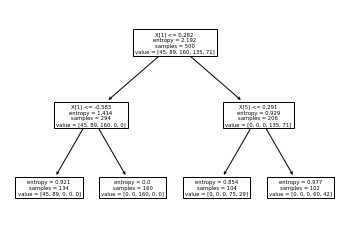

In [ ]:
tree.plot_tree(_arvore)

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([2, 2, 3, 2, 1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 2, 3, 2, 1, 3, 1, 3,
       3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 1, 2, 3,
       2, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 1,
       3, 1, 1, 3, 2, 3, 2, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3,
       3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 1,
       2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 3, 1, 3, 3,
       2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 1, 3, 2,
       1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 3, 2,
       2, 1, 1, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       2, 3, 1, 2, 3, 3, 1, 3, 2, 2, 1, 1, 1, 3, 1, 3, 1, 3, 3, 2, 3, 3,
       3, 3, 1, 2, 2, 2, 1, 3, 2, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2, 3, 1,
       1, 3, 3, 2, 2, 1, 3, 3, 2, 1, 3, 3, 2, 2, 1, 3, 2, 1, 1, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 2, 2, 3, 1, 1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1,
       1, 2, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 2, 2,

In [ ]:
print("Acurácia: %.4f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 77.4000%


In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

array([[  0,  44,   0,   0,   0],
       [  0, 101,   0,   0,   0],
       [  0,   0, 159,   0,   0],
       [  0,   0,   0, 127,   0],
       [  0,   0,   0,  69,   0]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.70      1.00      0.82       101
           2       1.00      1.00      1.00       159
           3       0.65      1.00      0.79       127
           4       0.00      0.00      0.00        69

    accuracy                           0.77       500
   macro avg       0.47      0.60      0.52       500
weighted avg       0.62      0.77      0.68       500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Análise dados de treino

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 2, 1, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 1, 1, 2, 1, 2,
       3, 1, 2, 1, 3, 2, 3, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 2,
       3, 2, 3, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1,
       2, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 2, 3, 3, 1, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 1, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 2,
       3, 3, 3, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 2,
       1, 1, 2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2, 1, 3, 2, 2, 3, 3, 2, 2,
       3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 3, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 1, 3, 3, 2, 3, 3, 1, 1, 3,
       2, 1, 3, 3, 3, 3, 1, 3, 2, 1, 3, 2, 3, 2, 1, 3, 2, 2, 3, 3, 1, 3,
       2, 1, 2, 1, 2, 1, 3, 3, 1, 3, 2, 2, 3, 2, 3,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.768

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[  0,  45,   0,   0,   0],
       [  0,  89,   0,   0,   0],
       [  0,   0, 160,   0,   0],
       [  0,   0,   0, 135,   0],
       [  0,   0,   0,  71,   0]])

**Conclusão: o algoritmo decision tree teve**

- Acurácia de treino: 77.4%
- Acurácia de teste: 76.8%

- parâmetros: criterion='entropy', random_state = 0, max_depth=2, min_samples_leaf=1, min_weight_fraction_leaf=0.2

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, target, test_size = 0.3, random_state = 10)

In [ ]:
random = RandomForestClassifier(n_estimators=1, criterion='entropy', random_state = 0)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=0)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([2, 2, 4, 2, 3, 4, 1, 3, 4, 2, 3, 4, 3, 1, 4, 2, 4, 2, 1, 3, 1, 4,
       3, 1, 1, 2, 3, 3, 4, 3, 2, 3, 0, 2, 3, 0, 2, 4, 3, 2, 4, 1, 1, 3,
       2, 4, 2, 3, 1, 2, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0,
       4, 1, 1, 4, 2, 3, 2, 3, 2, 1, 4, 2, 0, 2, 1, 2, 2, 2, 2, 2, 4, 3,
       4, 2, 2, 3, 1, 4, 4, 2, 3, 4, 2, 3, 3, 1, 3, 3, 4, 1, 3, 3, 3, 0,
       2, 2, 0, 3, 2, 2, 0, 1, 2, 2, 1, 4, 1, 2, 0, 2, 1, 1, 3, 1, 4, 4,
       2, 2, 1, 2, 1, 4, 0, 2, 4, 2, 4, 2, 2, 3, 2, 1, 3, 4, 2, 1, 4, 2,
       1, 2, 4, 1, 1, 1, 2, 2, 3, 3, 4, 1, 1, 0, 3, 2, 1, 2, 0, 4, 4, 2,
       2, 1, 1, 4, 3, 3, 4, 3, 1, 2, 1, 1, 2, 0, 0, 0, 1, 3, 3, 1, 1, 1,
       1, 3, 0, 2, 4, 3, 1, 3, 2, 2, 0, 1, 1, 4, 0, 3, 0, 4, 3, 2, 3, 4,
       3, 3, 1, 2, 2, 2, 1, 4, 2, 1, 3, 3, 4, 3, 1, 3, 1, 3, 1, 2, 4, 1,
       1, 3, 3, 2, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 1, 4, 2, 1, 1, 3, 4, 4,
       4, 2, 2, 2, 1, 0, 3, 2, 2, 3, 1, 2, 2, 0, 4, 3, 1, 2, 0, 3, 3, 0,
       1, 2, 1, 3, 2, 1, 1, 3, 4, 4, 4, 4, 2, 2])

In [ ]:
print("Acurácia: %.4f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 84.0000%


In [ ]:
confusion_matrix(y_teste, previsoes_random)

array([[17,  9,  0,  1,  0],
       [ 9, 50,  3,  2,  0],
       [ 0,  6, 81,  2,  1],
       [ 0,  1,  1, 63, 10],
       [ 0,  0,  0,  3, 41]])

In [ ]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        27
           1       0.76      0.78      0.77        64
           2       0.95      0.90      0.93        90
           3       0.89      0.84      0.86        75
           4       0.79      0.93      0.85        44

    accuracy                           0.84       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9114285714285715

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[  0,  62,   0,   0,   0],
       [  0, 126,   0,   0,   0],
       [  0,   0, 229,   0,   0],
       [  0,   0,   0, 187,   0],
       [  0,   0,   0,   0,  96]])

**Conclusão: o algoritmo de random forests teve**

- Acurácia de treino: 84%
- Acurácia de teste: 91%

- parâmetros: criterion='entropy', random_state = 0, max_depth=2, min_samples_leaf=1, min_weight_fraction_leaf=0.2

## Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, target, test_size = 0.3, random_state = 10)

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=2,solver="liblinear")
# Para pequenos conjuntos de dados, 'liblinear' é uma boa escolha
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=600, random_state=1, solver='liblinear')

In [ ]:
logistica.intercept_

array([-7.52878334, -2.18752523, -0.74927605, -1.60428936, -7.05648106])

In [ ]:
logistica.coef_

array([[ 2.54850578e-01, -5.07086547e+00,  9.43988585e-02,
         1.55279493e-02, -1.37338870e-02, -2.74800221e-01,
        -1.35050789e-04,  2.76510970e-01],
       [-4.73777079e-01, -1.62000771e+00, -1.10467523e-01,
        -2.14522133e-02,  1.04101299e-01,  6.79227499e-01,
         1.48315231e-01, -9.08862084e-01],
       [ 5.04098598e-02, -2.12752699e-01, -7.20981504e-03,
        -4.43236380e-02,  6.90556623e-03, -5.02535791e-01,
         3.05340884e-01,  1.75630153e-01],
       [ 9.56740534e-01,  1.55355635e+00, -5.45538687e-03,
        -5.14455452e-02, -6.66064394e-01, -1.68288880e+00,
        -1.23527357e+00,  3.14446992e+00],
       [-4.54388014e-01,  5.96426853e+00, -2.76221597e-02,
         3.04086998e-02,  3.46252262e-01,  9.86077078e-01,
         3.34969271e-01, -1.36848832e+00]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([2, 2, 3, 2, 2, 4, 2, 3, 3, 2, 3, 4, 3, 1, 4, 2, 4, 2, 2, 3, 2, 4,
       3, 2, 1, 3, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 4, 1, 2, 3,
       2, 4, 2, 3, 0, 2, 2, 3, 0, 0, 2, 2, 3, 3, 3, 3, 2, 3, 0, 3, 2, 0,
       4, 2, 0, 4, 2, 4, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 4, 3,
       4, 2, 2, 2, 1, 2, 3, 3, 2, 4, 2, 3, 4, 2, 2, 3, 4, 0, 3, 2, 2, 0,
       2, 3, 1, 3, 2, 3, 2, 1, 2, 2, 2, 4, 1, 2, 0, 2, 1, 1, 3, 2, 3, 4,
       2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 4, 2,
       1, 2, 4, 2, 1, 1, 2, 2, 2, 2, 4, 0, 1, 0, 3, 2, 1, 2, 0, 4, 4, 2,
       2, 2, 2, 4, 3, 3, 4, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       2, 3, 2, 2, 4, 3, 0, 3, 2, 3, 0, 2, 1, 4, 0, 3, 0, 4, 3, 2, 3, 4,
       3, 3, 2, 2, 2, 2, 1, 4, 2, 0, 2, 3, 4, 2, 2, 2, 2, 3, 0, 2, 4, 2,
       2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 4, 3, 2, 2, 1, 4, 2, 2, 2, 3, 2, 4,
       4, 2, 2, 2, 2, 0, 3, 2, 2, 3, 1, 2, 2, 1, 4, 3, 1, 2, 2, 2, 3, 0,
       2, 2, 0, 3, 2, 1, 2, 3, 4, 4, 4, 4, 3, 2])

In [ ]:
print("Acurácia: %.4f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 79.3333%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[26,  1,  0,  0,  0],
       [ 0, 29, 35,  0,  0],
       [ 0,  0, 83,  7,  0],
       [ 0,  0, 18, 57,  0],
       [ 0,  0,  0,  1, 43]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.97      0.45      0.62        64
           2       0.61      0.92      0.73        90
           3       0.88      0.76      0.81        75
           4       1.00      0.98      0.99        44

    accuracy                           0.79       300
   macro avg       0.89      0.82      0.83       300
weighted avg       0.85      0.79      0.79       300



Analise dados de treino

In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([2, 4, 0, 2, 2, 4, 3, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 4, 0, 2,
       2, 3, 3, 2, 0, 2, 2, 4, 4, 3, 2, 3, 2, 2, 4, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 4, 2, 3, 2, 3, 0, 2, 2,
       2, 2, 2, 2, 3, 4, 4, 0, 4, 2, 3, 3, 2, 3, 3, 3, 2, 2, 4, 4, 2, 2,
       4, 3, 2, 1, 3, 2, 2, 4, 2, 1, 3, 4, 4, 3, 1, 2, 2, 2, 2, 3, 3, 0,
       2, 2, 1, 3, 4, 0, 3, 4, 1, 2, 0, 3, 2, 1, 0, 3, 2, 2, 0, 0, 2, 1,
       2, 3, 2, 3, 2, 3, 2, 3, 3, 4, 0, 1, 2, 2, 4, 2, 2, 4, 2, 0, 2, 3,
       1, 3, 3, 1, 2, 1, 2, 2, 1, 3, 2, 4, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1,
       4, 3, 1, 2, 2, 3, 1, 2, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 1, 0, 2, 4, 3, 2, 3, 3, 3, 2, 4, 3, 4, 1, 0, 1, 2, 0, 2, 2, 1,
       3, 2, 3, 2, 4, 3, 4, 1, 2, 4, 4, 2, 2, 4, 4, 0, 4, 2, 2, 0, 1, 2,
       2, 2, 4, 0, 2, 1, 2, 2, 3, 2, 1, 3, 3, 2, 0, 1, 3, 2, 1, 2, 2, 2,
       3, 2, 3, 2, 3, 3, 0, 4, 1, 0, 1, 4, 2, 4, 1, 1, 0, 0, 2, 3, 0, 0,
       2, 1, 2, 2, 2, 2, 0, 3, 3, 4, 2, 2, 3, 2, 3,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8428571428571429

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[ 62,   0,   0,   0,   0],
       [  0,  65,  61,   0,   0],
       [  0,   0, 211,  18,   0],
       [  0,   0,  31, 156,   0],
       [  0,   0,   0,   0,  96]])

**Conclusão: o algoritmo de logistic regression teve**

- Acurácia de treino: 79.3%
- Acurácia de teste: 84%

- parâmetros: random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=2,solver="liblinear"